# Working with Geographic Data

So, now we have seen how to build a map. But we are a Data Commons, and we work with **data**.  So let's start understanding data sources.

You are probably used to working with data in spreadsheets or in a tool like [AirTable](https://www.airtable.com). These tools organize data in **tabular format**  -- each dataset is a rectangle with a certain number of rows and columns.  In data science, we sometims call these structures **data frames**, and python has a special package to work with dataframes called [pandas](https://pandas.pydata.org). 

## Pandas Dataframes
Let's import the pandas package and create a simple dataframe.  We'll use a popular open dataset used in many examples on the web, called "iris".

:::{tip}
Notice that wer're using `import` a little differently here than the last time.  By adding `as pd`, we're telling python "import as usual, but instead of calling the pandas api with the name `pandas`, we'll use the name `pd`.  pdf is the standard abbreviation used by most pythonistas.
:::

In [1]:
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


What happened here?  Well, we asked pandas to fetch a csv file on the web ( `https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv`), and create a DataFrame object named "iris" from that CSV. And then we asked pandas to show us the the dataset. 

There is a lot to learn about pandas, but we'll ignore most of its complexities for now (we'll explore a tiny fraction of its capabilities later). Our real reason for introucing it is to show off an amazing extension of pandas called [geopandas](https://geopandas.org/en/stable/). Geopandas has a number of sophisticated features for working with geographic datasets.

## Geopandas Dataframes

Geopandas dataframes build on regular pandas. They can do everything pandas can do, but in adidtion, there are special mapping features that would take a lot of work for you to replicate with ordinary `pd.dataFrame` objects. The `GeoDataFrame` makes our lives a lot easier.  

Let's begin by acquiring the boundaries of all the ocuntries in the world. The GIS company ESRI [provides such a dataset for free](https://hub.arcgis.com/datasets/esri::world-countries-generalized/explore), though they don't like to share the direct URL for it.  So instead, we have downloaded the dataset in a file near this textbook.

Unlike `iris`, this dataset is not stured as a CSV, but in a format called [GeoJSON](https://geojson.org/). Working with GeoJSON directly can be difficult and confusing, but geopandas makes it easy. Let's import the dataset and take a look:

In [2]:
import geopandas as gpd
countries = gpd.read_file('data/countries.geojson')
countries

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,geometry
0,1,Afghanistan,AF,Afghanistan,AF,"POLYGON ((6821274.810 4246712.610, 6823482.060..."
1,2,Albania,AL,Albania,AL,"POLYGON ((2178614.504 5113950.867, 2179852.164..."
2,3,Algeria,DZ,Algeria,DZ,"POLYGON ((512443.030 4423494.247, 516027.527 4..."
3,4,American Samoa,AS,United States,US,"POLYGON ((-19007124.005 -1617338.540, -1900773..."
4,5,Andorra,AD,Andorra,AD,"POLYGON ((160949.743 5251578.747, 165479.439 5..."
...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,"MULTIPOLYGON (((11919975.671 1933404.703, 1192..."
247,248,Wallis and Futuna,WF,France,FR,"MULTIPOLYGON (((-19821639.593 -1611402.115, -1..."
248,249,Yemen,YE,Yemen,YE,"MULTIPOLYGON (((5260340.777 1530115.438, 52508..."
249,250,Zambia,ZM,Zambia,ZM,"POLYGON ((3363297.789 -1687093.287, 3363981.86..."


ok, kind of cool. Now let's do something cooler.

<Axes: >

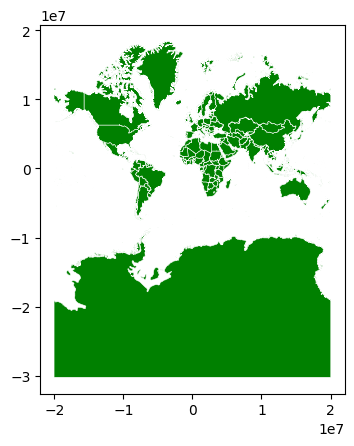

In [3]:
countries.plot(edgecolor="white", color="green", linewidth=0.4)

Geopandas  made a map! And it's a bit hard to tell, but it _overlaid_ a layer of information with country borders on that map.  Here' let's include only the last 20 or so countries in the alphabet, by shortening the dataframe (and, especially, let's get rid of Antacrtica!).

<Axes: >

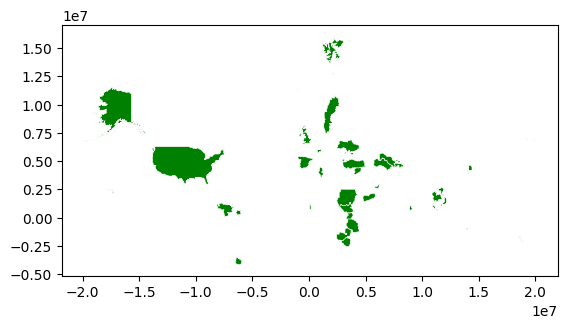

In [4]:
countries.tail(40).plot( edgecolor="white", color="green", linewidth=0.4)

## Merging datasets

OK, that was... fine, but not yet incredibly interesting.  What we really want is to show **the geographic dependencies of non-geographic variables.**  Like, how odes wealth or population density vary by country?  

T0 do this, we will *merge* our ocuntry geometry data with a second dataset. One simple statistic, on which we have lots of data, is population.  Let's makea `choropleth` picture -- a map in which the color of each country is proportional to its population.

Fortunatley, this data [is very easy to get](https://stats.oecd.org/Index.aspx?DataSetCode=EDU_DEM), and we've saved it in the file `data/population.csv`. It doesn't have any geographical geometry information, so we can't actually make it into a GeoDataFrame.  So we'll create a standards pandas DataFrame instead:

In [5]:
pop = pd.read_csv('data/world_population.csv')
pop.head(2)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04


Oh look, here's a stroke of luck. Remember our `countries` dataset from above:

In [6]:
countries.head(2)

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,geometry
0,1,Afghanistan,AF,Afghanistan,AF,"POLYGON ((6821274.810 4246712.610, 6823482.060..."
1,2,Albania,AL,Albania,AL,"POLYGON ((2178614.504 5113950.867, 2179852.164..."


**Both** datasets contain a column with the country names, and they appear to be identical!  This is gret news -- it means we can **merge** these datasets together, using the commons information as a "key"! Terrific. Now we just need to instruct `gpd` how to find that two columns -- which, you'll notice, have different names. Here's how we do that:

In [7]:
joined = gpd.GeoDataFrame(countries.merge(pop, left_on="COUNTRY", right_on='Country/Territory'))
joined.head(2)

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,geometry,Rank,CCA3,Country/Territory,Capital,...,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,1,Afghanistan,AF,Afghanistan,AF,"POLYGON ((6821274.810 4246712.610, 6823482.060...",36,AFG,Afghanistan,Kabul,...,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,2,Albania,AL,Albania,AL,"POLYGON ((2178614.504 5113950.867, 2179852.164...",138,ALB,Albania,Tirana,...,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04


As you can see, we have now combined the two datasets. GeoPandas has a quick and dirty way of showing data on a map, using colors.

<Axes: >

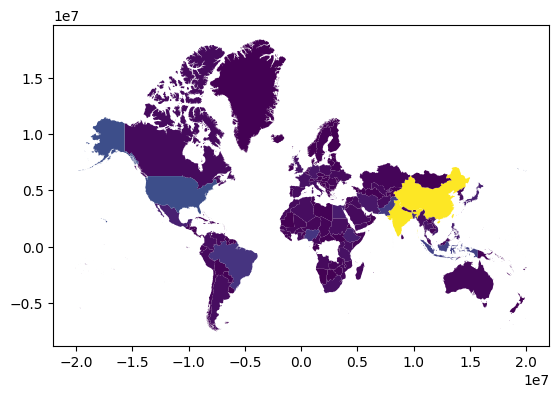

In [8]:
joined.plot(column='2022 Population')
